# Forecasts and predictions
Now we are analyst of the Model Fitness which is developing a customer interaction strategy based on analytical data. The most problem of the Company is churn rate and we should find the ways how to flight it in order to improve customer service.
## Purposes of the analysis
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
    - Identify target groups
    - Suggest measures to cut churn
    - Describe any other patterns with respect to interaction with customers

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

## Loading data

In [2]:
# Load the data file
path = 'E:\\Израиль\\Practicum\\Project 12\\'

try:
    df = pd.read_csv('/datasets/gym_churn_us.csv')
except FileNotFoundError:
    df = pd.read_csv(path+'gym_churn_us.csv')

## Explore initial data
The dataset includes the following fields:
- 'Churn' - the fact of churn for the month in question

**Current dataset fields:**
- User data for the preceding month
- 'gender'
- 'Near_Location' - whether the user lives or works in the neighborhood where the gym is located
- 'Partner' - whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- 'Promo_friends' - whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- 'Phone' - whether the user provided their phone number
- 'Age'
- 'Lifetime' - the time (in months) since the customer first came to the gym

**Data from the log of visits and purchases and data on current membership status:**
- 'Contract_period' - 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' -  the months remaining until the contract expires
- 'Group_visits' - whether the user takes part in group sessions
- 'Avg_class_frequency_total' - average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' - average frequency of visits per week over the preceding month
- 'Avg_additional_charges_total' - the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

In [3]:
# printing the general/summary information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# print a sample of data from df
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
# print a sample of data from df
df.tail(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [6]:
# print a sample of data from df
df.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3316,1,1,0,0,1,1,0,28,210.801934,1.0,0,2.015696,1.372404,1
3193,1,1,0,0,0,1,0,28,37.133890,1.0,4,0.644667,0.563018,0
1131,0,0,1,0,1,6,0,29,136.896629,6.0,1,2.041550,2.178611,0
956,0,1,0,0,1,1,0,26,147.965641,1.0,0,1.416032,0.597629,1
3224,0,1,1,1,1,6,0,36,165.197097,6.0,2,2.747704,2.918627,0


## EDA
We have 4000 rows and 14 columns in our data. The data looks good. There is no missing values and all columns have appropriate data types. Before we start evaluating different features, we just need to check for duplicates and we will transform column names to lower case.

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

We have no duplicates. That's good. Let's change column names to lower case

In [8]:
# Changing column names to lower case
df.columns = df.columns.str.lower()
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


We have successfully changed column names to lower case and that's all we needed before analysis. No missing values and all column types are correct. Let's look at the distribution of the data. We will use describe method and then we will write a function for visualization. We will use it to look at the distribution of the whole data, and then we will divide our data into 2 parts depending on churn and we will compare features for those parts.

In [9]:
# applying describe method to the data 
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


gender
1    51.0%
0    49.0%
Name: gender, dtype: object
near_location
1    84.5%
0    15.5%
Name: near_location, dtype: object
partner
0    51.3%
1    48.7%
Name: partner, dtype: object
promo_friends
0    69.2%
1    30.9%
Name: promo_friends, dtype: object
phone
1    90.3%
0     9.7%
Name: phone, dtype: object
contract_period
1     55.2%
12    24.0%
6     20.8%
Name: contract_period, dtype: object


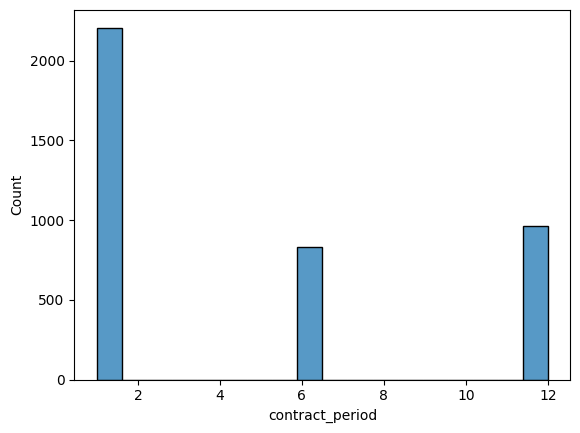

group_visits
0    58.8%
1    41.2%
Name: group_visits, dtype: object


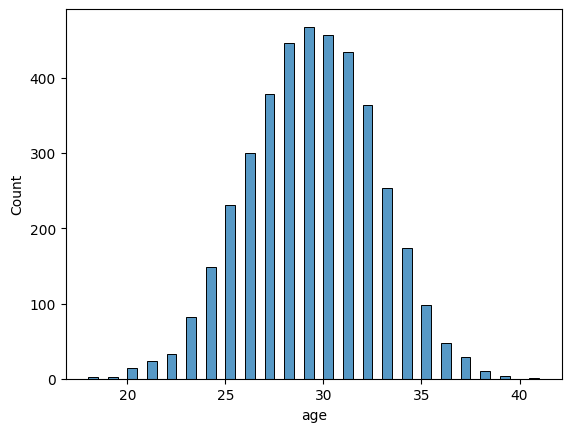

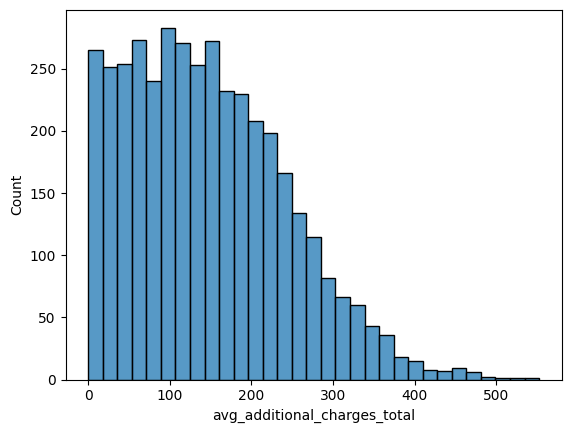

month_to_end_contract
1.0     55.2%
6.0     16.1%
12.0    13.1%
11.0     4.5%
5.0      3.2%
10.0     2.1%
9.0      1.8%
4.0      1.5%
8.0      0.9%
7.0      0.6%
3.0      0.6%
2.0      0.4%
Name: month_to_end_contract, dtype: object


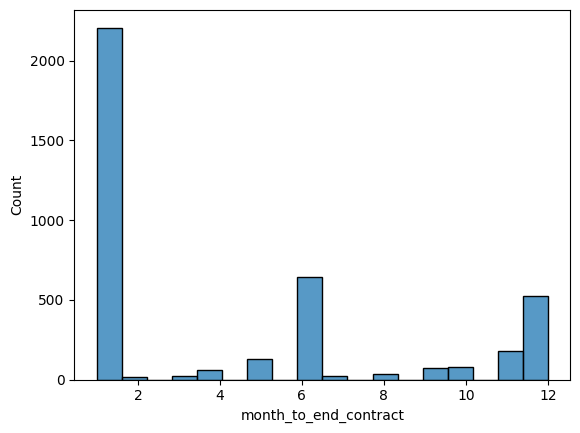

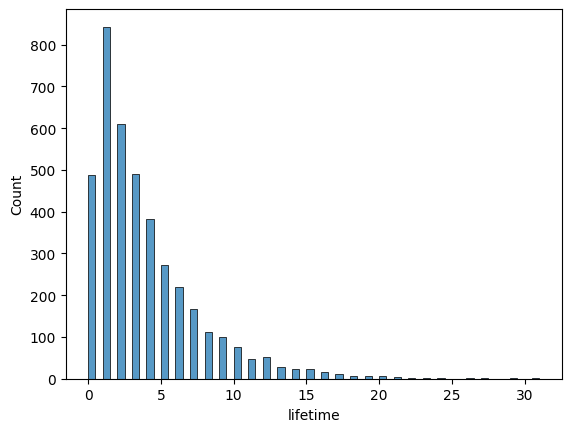

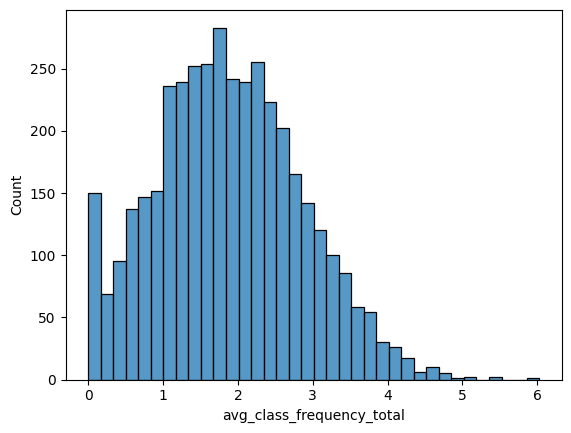

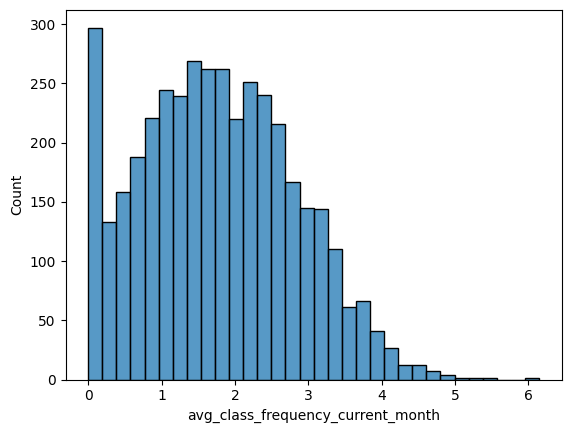

churn
0    73.5%
1    26.5%
Name: churn, dtype: object


In [10]:
# Defining a function for distribution of the features for different data frames 
def distribution(data):
    for col in data.columns:
        if (col == 'gender' or 
            col =='near_location' or 
            col == 'partner' or
            col == 'promo_friends' or 
            col == 'phone' or 
            col == 'group_visits' or 
            col =='churn'):
            print(col)
            print((data[col].value_counts() / len(data)).map("{:.1%}".format))
        elif col == 'contract_period' or col == 'month_to_end_contract':
                print(col)
                print((data[col].value_counts() / len(data)).map("{:.1%}".format))
                sns.histplot(data[col])
                plt.show()          
        else: 
            sns.histplot(data[col])
            plt.show()

# Applying the function to the full Data Frame
distribution(df)

We have almost equal gender distribution in our data. And age distribution is close to the standard one. We have pretty young auditory from 18 to 41 years old and mean as well as median age is 29 years old. 

Almost 85% of customers live near our Company, about half of them (51%) are employees of a partner company,  69% of customers signed up through a "bring a friend" offer, and majority of them (90%) left their phone number. 

We have only 3 options for contracts: for 1 month, for 6 months and for 12 months. The most of the contracts (55%) are for 1 month, 6 month and 12 month contracts have its share of 21% and 24% accordingly.

About 60% of customers are involved in group sessions.

Our customers spent some money for additional services but not so much. Maximum amount of money spent is about 550 USD, but in average they spent 130 - 140 USD. We have this distribution skewed to the right which is common for such services. 25% of people just spent about 70 USD for additional services.

Most of our contracts are just for 1 month, that's why the period till the end of the contract has almost the same distribution. 55% of the customers have that time of 1 month 16% of them have 6 month period of time till the end of the contract and 13% of them - 12 month. Other periods have their share below 5%. 

The distribution of life time for our customers is also skewed to the right. In average they came just 3 (median) - 3.7 (mean) months ago, so most of our clients are pretty newbies. 

The distributions of average visit times in total and in the current month look very similar. That means that the number of visits is almost constant. There is no significant changes in customers behavior during the current month, which is good and the results of our analysis will be relevant. In  average customers went to our Company 2 times a week and 6 times a week maximum. The numbers for current month are slightly lower because we have more people who did not come yet in the current month. This is reasonable.

And finally we have 26% of people who have churned. The share is pretty big and we need to investigate it.

Now let's compare mean features for those who churned and who stayed with us. We will group by our data with churn column and look at the means. 

In [11]:
# Grouping the data to compare churn people with those who stayed.
data_group = df.groupby('churn')['gender', 'near_location', 'partner', 'promo_friends', 'phone',
                                 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total',
                                 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
                                 'avg_class_frequency_current_month'].mean().reset_index()
data_group.T

C:\Users\Александр\AppData\Local\Temp\ipykernel_23288\1738960056.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_group = df.groupby('churn')['gender', 'near_location', 'partner', 'promo_friends', 'phone',


,0,1
churn,0.000000,1.000000
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899


We see that mean gender, age, near location and phone feature are pretty much the same for churned and non churned customers. But other features are different. 

53% of non churn customers are employees of a partner company, and they are only 35% of those who churned. The share of customers who signed up through a "bring a friend" offer is twice large among non churned customers.

Non churned customers have much longer time till the end of the contract. They have in average about 6 months till the end of it, and the churned customers have average time till the end of their contract just 1.7 month.

46% of non churn customers are involved in group session and just 27% of non churned people will do the same.
Non churned people spend more money for additional services. Their average check is 158 USD and Churned people spend in average 115 USD for that.

Non churned customers have much longer contracts. Their average contract length is 5.2 month, the same figure for churned people is just 1.7 month. The same situation is for life time period. Average Life time for non churned people is 4.7 months, and churned customers have their average life time below 1 month. So most of the customers decide to churn within the first month.

Also non churned people will come to us twice a week in average and the churned customers just once a week.

No let's divide our data to 2 data frames. For churn and non churn people and look at the distribution of all the features. We have already function for distribution, so, it would not be challenging.

Distribution of churned customers:
gender
1    51.1%
0    48.9%
Name: gender, dtype: object
near_location
1    76.8%
0    23.2%
Name: near_location, dtype: object
partner
0    64.5%
1    35.5%
Name: partner, dtype: object
promo_friends
0    81.6%
1    18.4%
Name: promo_friends, dtype: object
phone
1    90.3%
0     9.7%
Name: phone, dtype: object
contract_period
1     88.0%
6      9.8%
12     2.2%
Name: contract_period, dtype: object


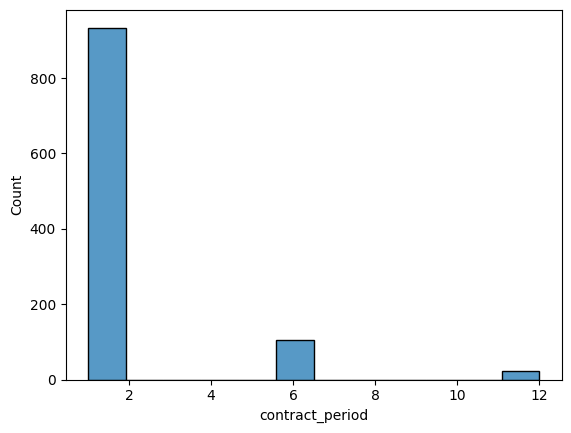

group_visits
0    73.1%
1    26.9%
Name: group_visits, dtype: object


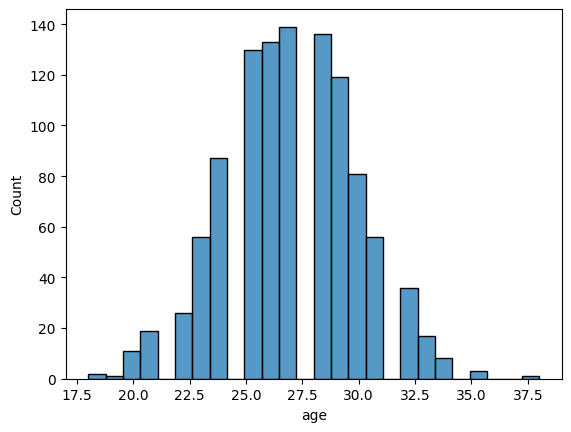

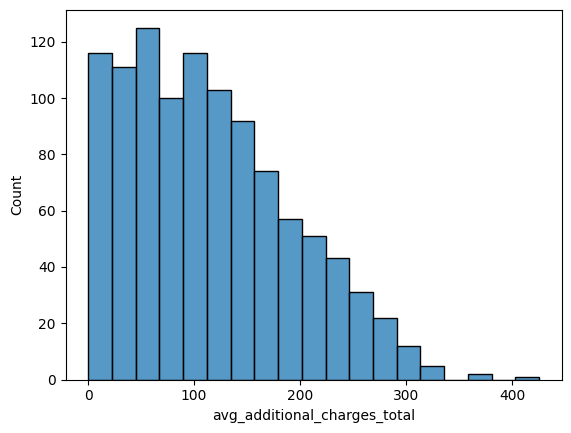

month_to_end_contract
1.0     88.0%
6.0      7.2%
5.0      1.8%
12.0     1.2%
4.0      0.7%
11.0     0.4%
10.0     0.2%
2.0      0.2%
7.0      0.1%
8.0      0.1%
3.0      0.1%
9.0      0.1%
Name: month_to_end_contract, dtype: object


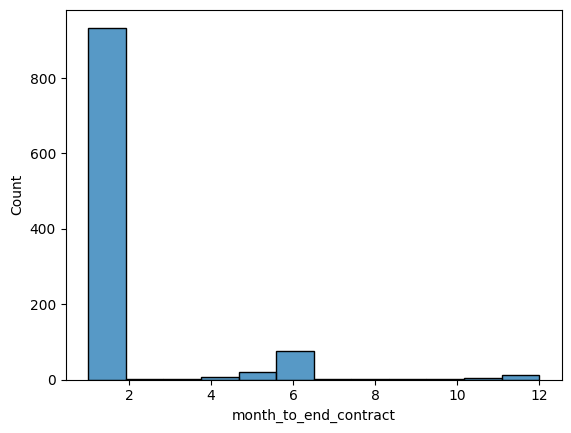

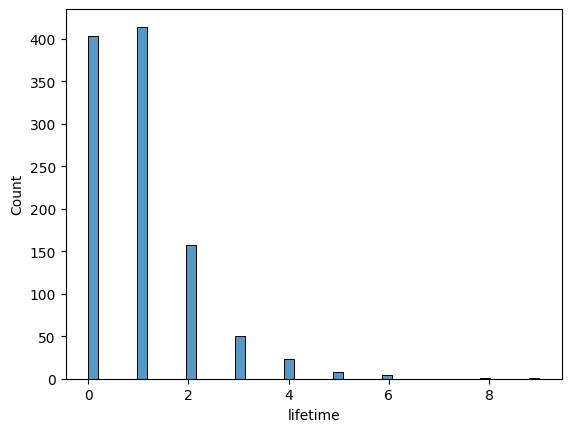

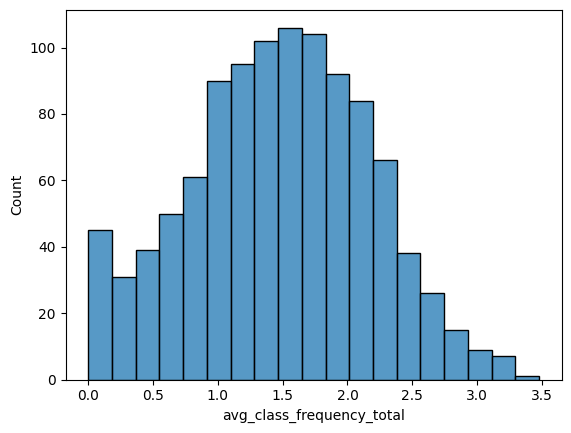

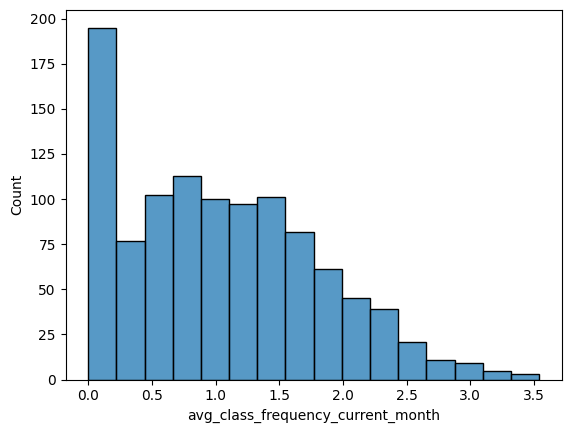

Distribution of non churned customers:
gender
1    51.0%
0    49.0%
Name: gender, dtype: object
near_location
1    87.3%
0    12.7%
Name: near_location, dtype: object
partner
1    53.4%
0    46.6%
Name: partner, dtype: object
promo_friends
0    64.6%
1    35.4%
Name: promo_friends, dtype: object
phone
1    90.4%
0     9.6%
Name: phone, dtype: object
contract_period
1     43.3%
12    31.9%
6     24.8%
Name: contract_period, dtype: object


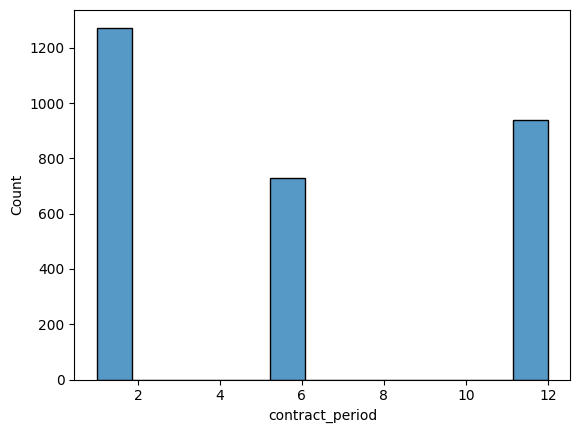

group_visits
0    53.6%
1    46.4%
Name: group_visits, dtype: object


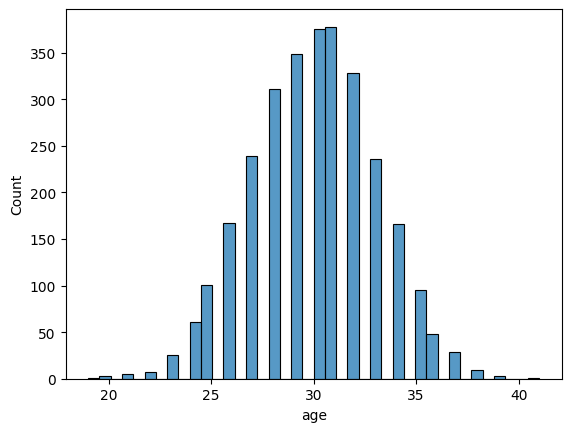

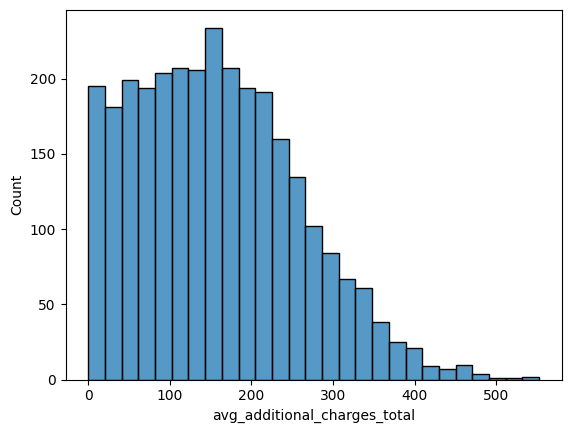

month_to_end_contract
1.0     43.3%
6.0     19.4%
12.0    17.4%
11.0     6.0%
5.0      3.8%
10.0     2.7%
9.0      2.4%
4.0      1.7%
8.0      1.3%
7.0      0.8%
3.0      0.7%
2.0      0.4%
Name: month_to_end_contract, dtype: object


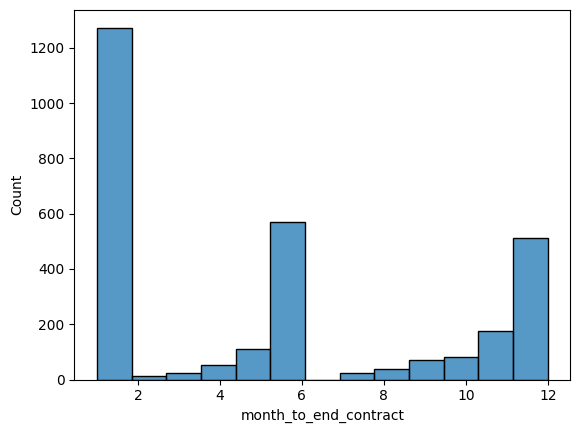

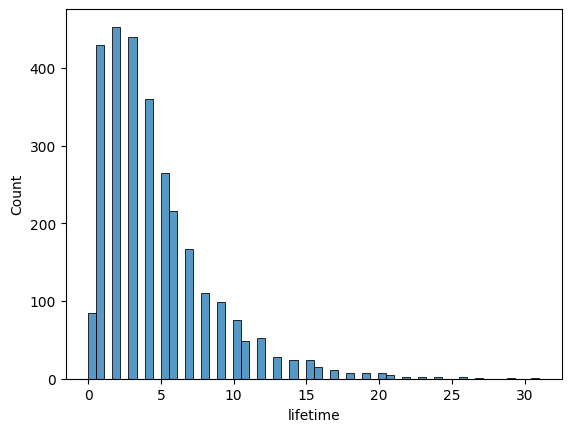

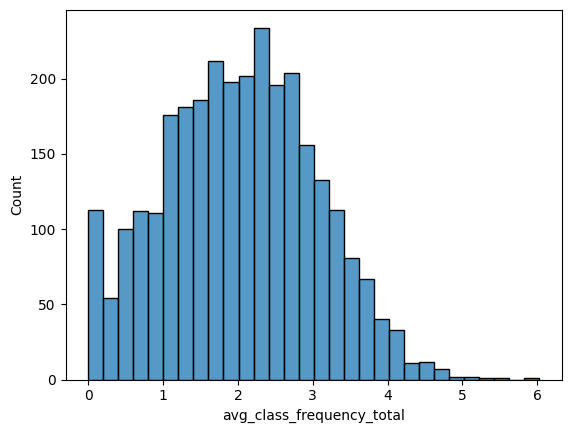

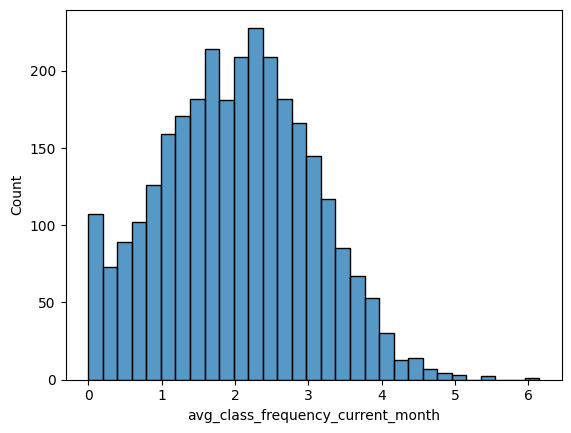

In [12]:
# Dividing data into 2 sets depending on churn factor
df_churn = df.query('churn == 1').drop('churn', axis=1)
df_nonchurn = df.query('churn == 0').drop('churn', axis=1)

# Looking for the distribution of churned customers
print('Distribution of churned customers:')
distribution(df_churn)

# Looking for the distribution of  non churned customers
print('Distribution of non churned customers:')
distribution(df_nonchurn)

For features we have mentioned as stable to churn factors distributions are pretty much the same. We need to mention that non churned customers are more likely to live near the company.  77% of churned customers have their location near our company and 87% of non churned customers have the same.

35% of churned customers are employees of a partner company and 47% of non churned customers work for partners. So, partners have a positive effect to our customers

18% of churned customers signed up through a "bring a friend" offer and 35% of non churn customers did the same. So recommendation of friends are pretty good and such customers are less likely to churn

Contract distribution differs much between churned and non churned customers. 88% of churned customers have their contract just for 1 month, and only 43% of non churn customers have such short contracts. 32% of them have even contracts for 12 months and only 2% of churned customers have such long contracts. So Contract period is the factor and people who have contracts longer than 1 month are much less likely to churn. The same thing we have with the time till the end of the contract. 88% of churned customers have just 1 month till the end of the contract, and only 43% of  non churned people have such short period of time till the end of the contract. These features are strongly interconnected.  

Only 27% of churned customers took part at group sessions and and 46% of non churn customers will do that. So, group sessions are good in order not to let people churn.

We have already mentioned that people who are going to churn do not like to spend money on additional services. The average check is 158 USD for non churned customers and churned customers spend in average 115 USD for that.

88% of Churned customers have just 1 month till the end of the contract.

The life time period is pretty short for churned customers. Majority of them quit just after the first month or within first 2 months. Non churn customers are have much longer life time period. Average Life time for non churned people is 4.7 months, and churned customers have their average life time below 1 month.

And we see that non churned customers visit our company more often. The distribution as well as the average numbers show that. Also there is a big difference between visit frequency  in current month and in total for churned customers. The most of them just did not came at all within the last month and distribution of the current month visits is skewed to the right vs total visits distribution which is more or less close to standard. There is no such difference for non churned customers. They continue to visit us as usual. So we can suggest that if the customer changed his behavior and stopped visiting us in current month, that is the bell that he is going to churn.

Now, let's build a correlation matrix and look for correlations between  different features and churn as well as correlations between the features itself.  

In [13]:
#building correlation matrix
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


We don't see strong correlation between churn and other features but this is because we have just 2 options for most of the features. But we have very strong correlation between total weekly visits and weekly visits for last month (0.95), so we will leave just one of them  - visits for the last month, it shows possible churn better as we noticed before. Also we have strong correlation between   contract period and month till the end of contract (0.97). We also need to drop one of them and we will leave just contract period for the purpose of building our churn prediction model. Also during the previous analysis we saw that there is no dependence of churn on age, gender and phone features, we will drop those features too.

So, we will leave the following 8 features for our prediction model: near_location, partner, promo_friends, contract_period, group_visits, avg_additional_charges_total, lifetime, avg_class_frequency_current_month.

Let's look at distributions of our features where we have histograms more carefully. We will compare churn and non churn data frames, plotting histograms on one graph for churn and non churn customers. 

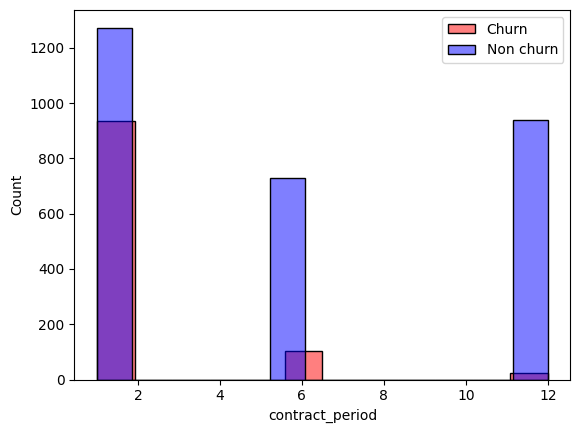

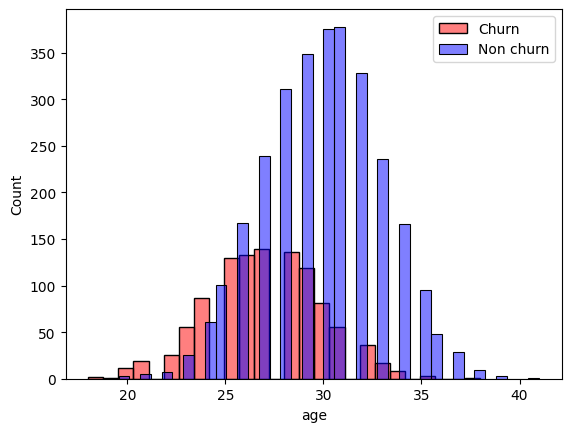

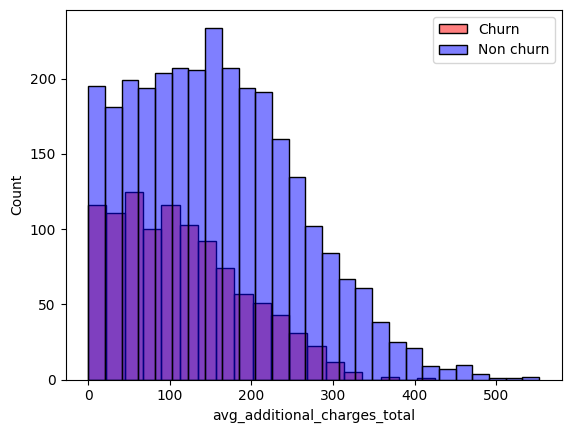

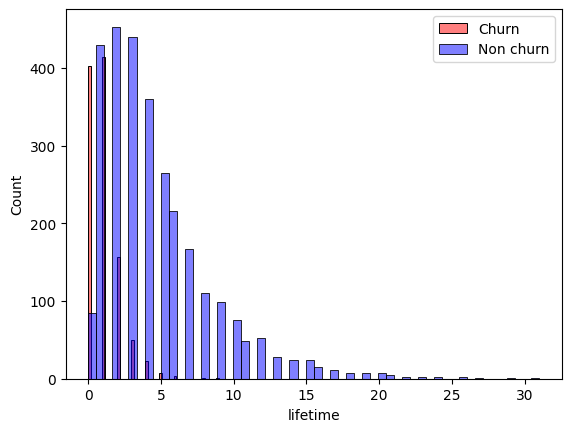

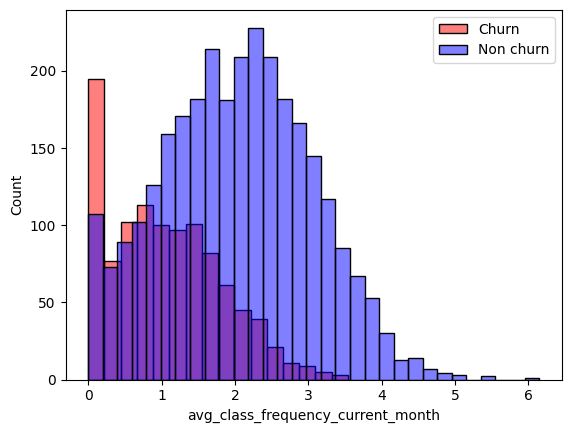

In [14]:
#Comparing histograms for churn and non churn customers
for col in df_churn:
        if (col == 'contract_period' or 
            col =='age' or 
            col == 'avg_additional_charges_total' or
            col == 'lifetime' or 
            col == 'avg_class_frequency_current_month'):  
            sns.histplot(df_churn[col], color = 'red', alpha = 0.5, label = 'Churn')
            sns.histplot(df_nonchurn[col], color = 'blue', alpha = 0.5, label = 'Non churn')
            plt.legend()
            plt.show()

Here we see the difference even for age category. Non churn customers are older  than churn. So, finally we will have 9 features for our prediction model: age, near_location, partner, promo_friends, contract_period, group_visits, avg_additional_charges_total, lifetime, avg_class_frequency_current_month

## Prediction model for user churn

In order to build a prediction model we will perform the following steps:
- 1) Prepare the data by removing the columns which are not our features we have determined on the previous step.
- 2) Create X  (features) and Y  (churn) samples  
- 3) Split these data into train and test samples
- 4) Standardize data
- 5) Apply different logistic regression and random forest algorithms
- 6) Analyze the key metrics of the models (accuracy,precision, recall, F1)
 
 Let's do this

In [15]:
 #Prepare the data by removing the columns which are not the features of the future model
df_clean = df.drop(['gender', 'phone', 'month_to_end_contract', 'avg_class_frequency_total'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   near_location                      4000 non-null   int64  
 1   partner                            4000 non-null   int64  
 2   promo_friends                      4000 non-null   int64  
 3   contract_period                    4000 non-null   int64  
 4   group_visits                       4000 non-null   int64  
 5   age                                4000 non-null   int64  
 6   avg_additional_charges_total       4000 non-null   float64
 7   lifetime                           4000 non-null   int64  
 8   avg_class_frequency_current_month  4000 non-null   float64
 9   churn                              4000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 312.6 KB


We have 10 columns in our data. 9 features and one target column 'churn'.

In [16]:
# Dividing the data into features (the X matrix) and a target variable (y)
X=df_clean.drop('churn', axis=1)
y=df_clean['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create a StandardScaler object and apply it to the train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

# declare the list of models
models = [LogisticRegression(), RandomForestClassifier()]

# the function that takes the model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f} F1: {:.2f} '.format(accuracy_score(y_test, y_pred), 
                                          precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                          f1_score(y_test, y_pred)))

# loop that outputs metrics for each model
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression()
Accuracy: 0.90 Precision: 0.79 Recall: 0.81 F1: 0.80 
RandomForestClassifier()
Accuracy: 0.90 Precision: 0.81 Recall: 0.77 F1: 0.79 


Both models have good accuracy 90%. That means that both models classify 90% of our customers correctly. Random Forest Model has slightly better precision, So there is only 19% of customers who are not churn but the model determined them as churn. On the other hand  Logistic Regression has better Recall metric, it means that there is only 19% of customers that are churn but the model determined them as non churn. And this model has slightly better F1 metric which is trade off between recall and precision.

Our Goal is to predict possibility of clients to churn. So,  it is more important for the model not to give us false negative predictions. We  should be pessimistic and it is better to count more churn customers than not to count some of them (false positive is better than false negative) That means that Recall is more important metric and for the purpose of our analysis Logistic Regression model has better performance.

Now, let's find out what features have more influence to the churn. We can plot diagram with the coefficients for Logistic regression model and we can use feature importance for Random Forest model.

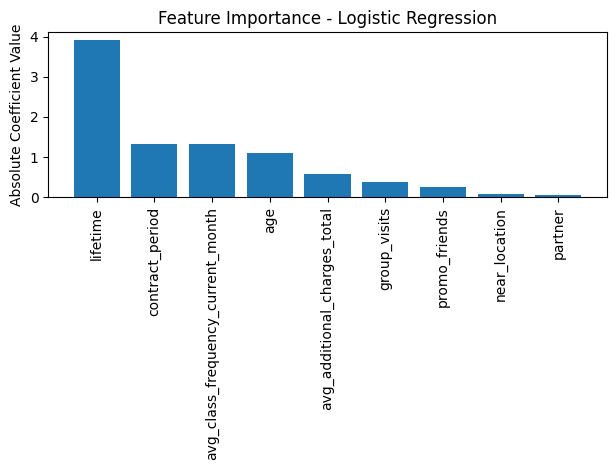

In [17]:
# Determine feature names
feature_names = X.columns

# Determine and fitting the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_st, y_train)

# Finding modulus of the coefficients for each feature
coefficients = logreg.coef_[0]
coefficients_abs = np.abs(coefficients) 

# Building Series with feature names and coefficients 
coefficients_series = pd.Series(coefficients_abs, index=feature_names)

# Sorting the coefficients in descending order
coefficients_sorted = coefficients_series.sort_values(ascending=False)

# Plotting Bar Diagram
fig, ax = plt.subplots()
plt.bar(coefficients_sorted.index, coefficients_sorted)
ax.set_title("Feature Importance - Logistic Regression")
ax.set_ylabel("Absolute Coefficient Value")
ax.set_xticks(range(len(coefficients_sorted)))
ax.set_xticklabels(coefficients_sorted.index, rotation=90)
fig.tight_layout()
plt.show()



According to Logistic regression model The most important factor is lifetime. It has much more influence to the churn than others. There are 3 more factors which are also important: contract period, frequency of visits, and age.
Let's build the same graph for Random forest model

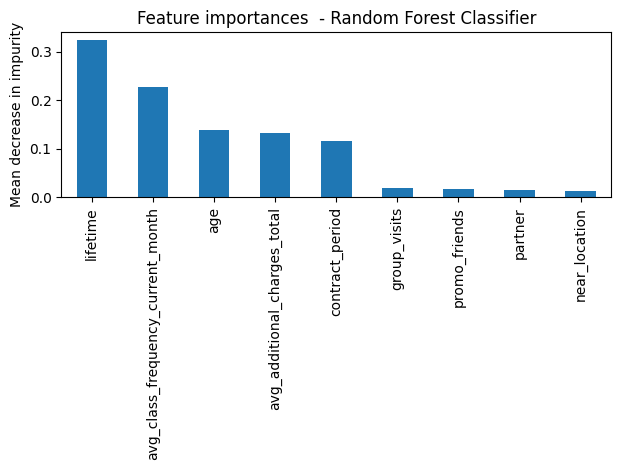

In [18]:
# Determine ande fitting the model
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_st, y_train)

# Creating Series with names and importances of the features
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

# Sorting the forest_importances
forest_importances = forest_importances.sort_values(ascending=False)

# Plotting Bar Diagram
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances  - Random Forest Classifier")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(forest_importances.index, rotation=90)
fig.tight_layout()
plt.show()

This model also shows that lifetime feature is the most important factor. visits frequency and age are also within the top factors. 
 
So according to both models we can see TOP 3 important features which has strong influence to the possibility of churn: life time, frequency of visits and age. No conflicts with the simple human logic. the customers who spend a lot of time with us and come to us frequently are not supposed to churn. But if we see that a customer decreased his number of visits, that is a signal that the customer has a possibility of churn and we should pay attention to him and investigate the reasons of decreased frequency of his visits. We should pay much attention to new customers as they are at the risk category in terms of chain. It is interesting that according to our analysis based on data age feature is important. Younger customers have bigger risk of churn. We should take this into account when planning the marketing strategy.

## User clusters

Now, let's create user clusters. We will take our X features, standardize them, then we will build a matrix of distances based on the standardized feature matrix and plot a dendrogram. After that,  we will train the clustering model with the K-means algorithm and predict customer clusters. Finally we will plot distributions of features for the clusters and Calculate the churn rate for each cluster. 

let's  standardize X variable where we have already removed correlated features and plot a dendogram to evaluate the number of clusters that we can create.

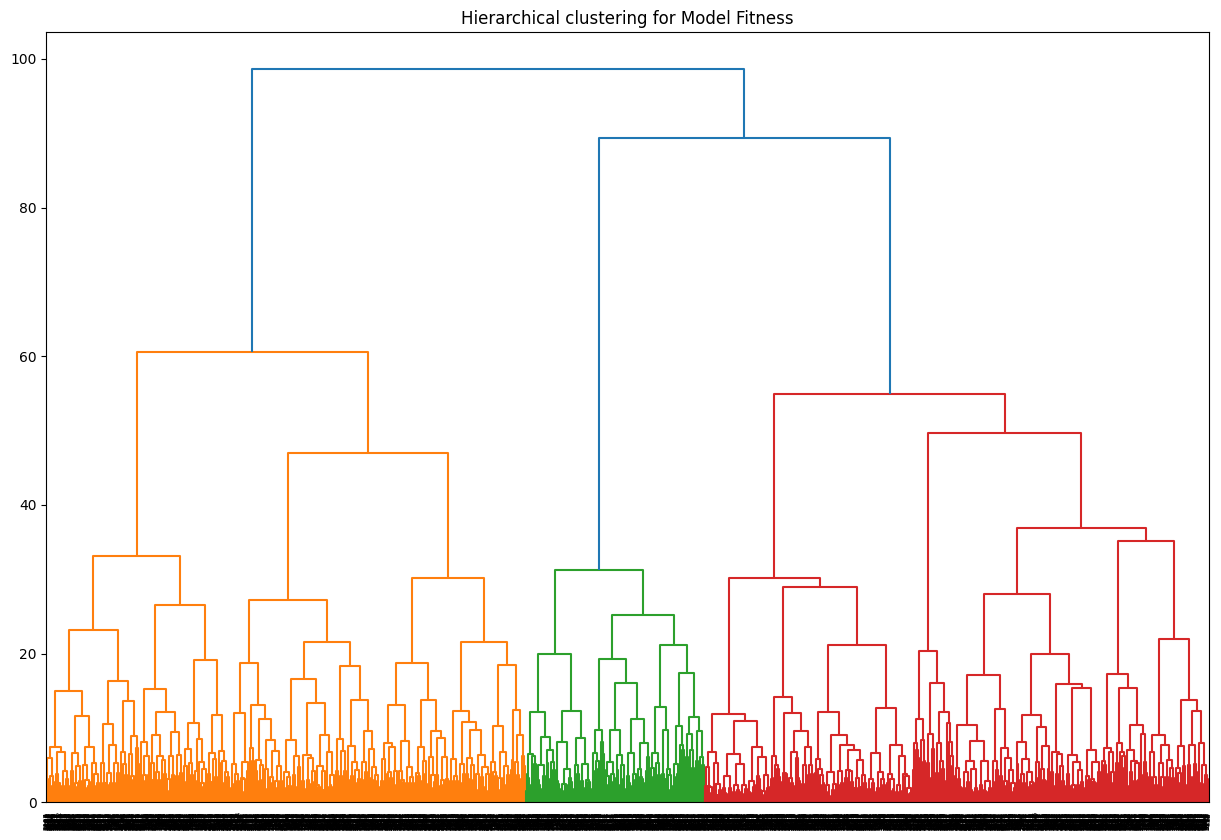

In [19]:
# Standardizing X (features)
X_sc = scaler.fit_transform(X)

# Building a matrix of distances
linked = linkage(X_sc, method = 'ward')

# Plotting a dendogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Model Fitness')
plt.show()

We see that we can make 3 clusters of users. But let's do a bit more, 5 clusters and see what we will get. Let's find the clusters with KMeans and build a table with average features for every cluster. 

In [20]:
# setting the number of clusters as 5
km = KMeans(n_clusters = 5)

# applying the algorithm to the data and forming a cluster vector
labels = km.fit_predict(X_sc)

# storing cluster labels in the field of our dataset
df_clean['cluster'] = labels

df_cluster = df_clean.groupby('cluster').mean()
df_cluster

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,
0,1.000000,0.225653,0.081948,4.173397,1.000000,29.337292,145.118253,2.763658,1.760247,0.233967
1,1.000000,0.230844,0.064016,2.658584,0.000000,28.311348,133.898867,2.100873,1.442717,0.467507
2,0.995972,0.953676,1.000000,7.174220,0.518630,29.495468,151.750872,3.841893,1.863957,0.136959
3,0.000000,0.492537,0.074627,2.943615,0.228856,28.686567,136.761283,2.839138,1.592998,0.406302
4,0.977401,0.517891,0.114878,6.725047,0.290019,30.619586,177.740001,9.188324,2.424014,0.001883


We see that clusters 1 and 3 are very similar. They have almost the same mean features and the same churn rate. So we have already noticed that recommended number of clusters is lower than we decided to do. That is the reason for that. 

Let's plot distributions of features for every cluster and compare them. We can use the function we have written previously. 

Distribution of the features for cluster 0
near_location
1    100.0%
Name: near_location, dtype: object
partner
0    77.4%
1    22.6%
Name: partner, dtype: object
promo_friends
0    91.8%
1     8.2%
Name: promo_friends, dtype: object
contract_period
1     59.6%
6     21.1%
12    19.2%
Name: contract_period, dtype: object


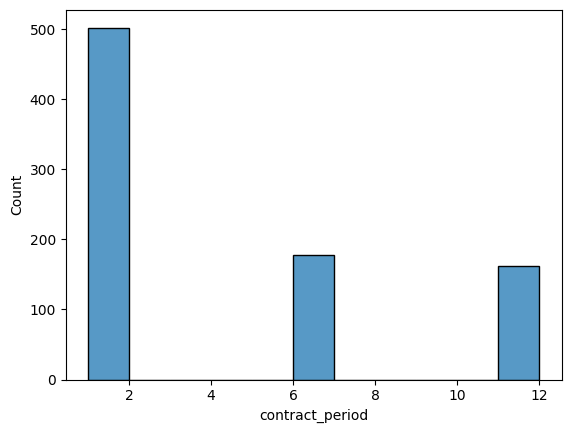

group_visits
1    100.0%
Name: group_visits, dtype: object


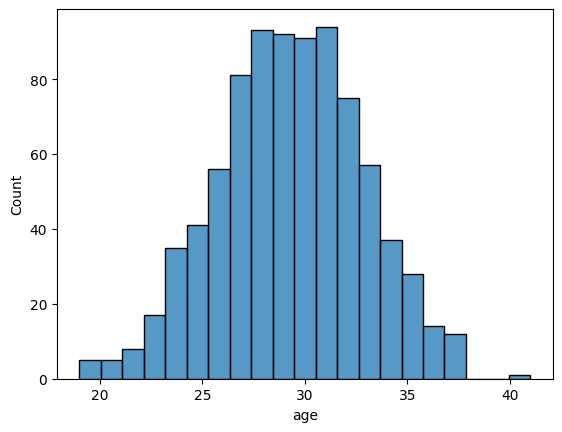

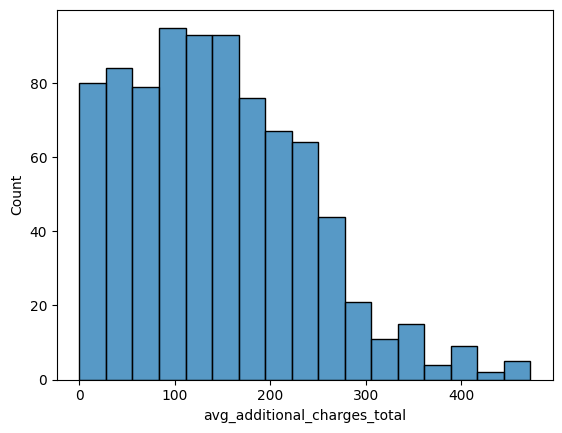

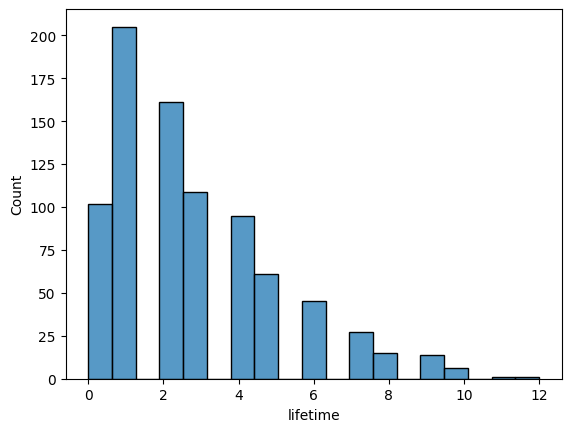

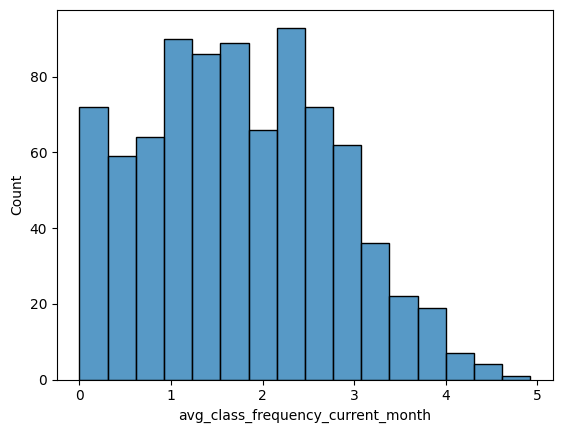

churn
0    76.6%
1    23.4%
Name: churn, dtype: object


In [21]:
#Creating tables for every cluster
df_0 = df_clean.query('cluster == 0').drop('cluster', axis=1)
df_1 = df_clean.query('cluster == 1').drop('cluster', axis=1)
df_2 = df_clean.query('cluster == 2').drop('cluster', axis=1)
df_3 = df_clean.query('cluster == 3').drop('cluster', axis=1)
df_4 = df_clean.query('cluster == 4').drop('cluster', axis=1)

#Building distributions for cluster 0
print('Distribution of the features for cluster 0')
distribution(df_0)

This cluster has 23% of churn customers. Here all customers live close to us and we have 77% of customers who are employees of a partner company. The majority of the customers here (92%) signed up through a "bring a friend" offer. 60% of customers have contract period for just for 1 month, all of the customers participate in group activities. We will compare age, visits frequency, life time and additional charges a bit later when plotting histograms of different clusters on one graph. 

Let's  look t the distribution for cluster 1

Distribution of the features for cluster 1
near_location
1    100.0%
Name: near_location, dtype: object
partner
0    76.9%
1    23.1%
Name: partner, dtype: object
promo_friends
0    93.6%
1     6.4%
Name: promo_friends, dtype: object
contract_period
1     76.1%
6     16.1%
12     7.8%
Name: contract_period, dtype: object


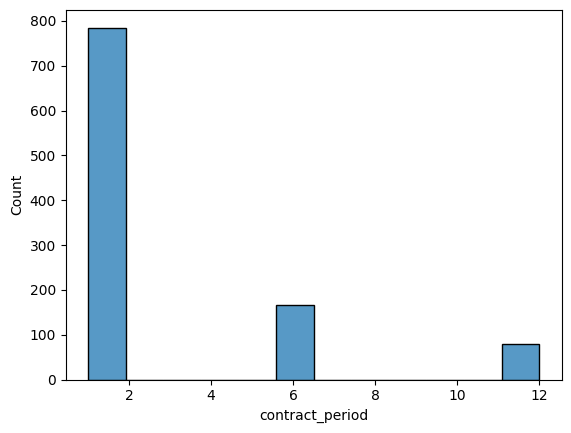

group_visits
0    100.0%
Name: group_visits, dtype: object


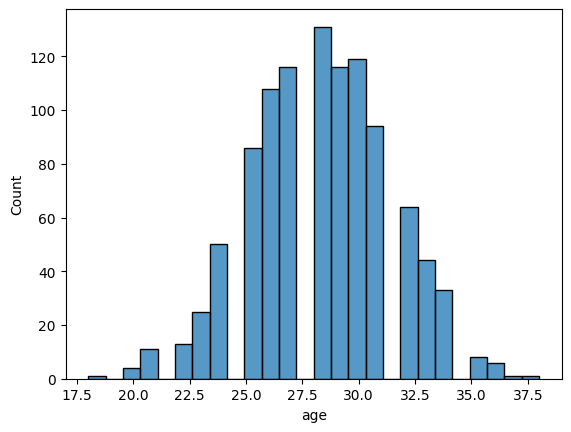

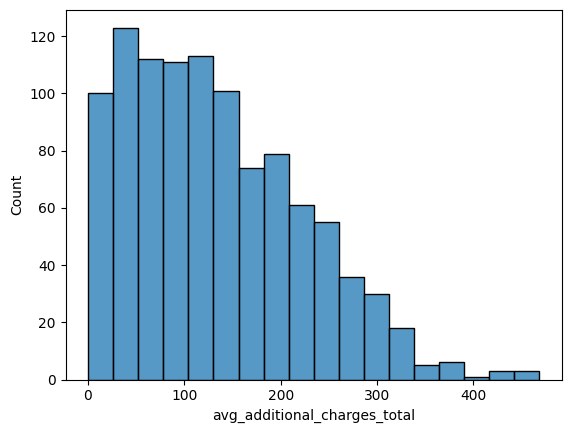

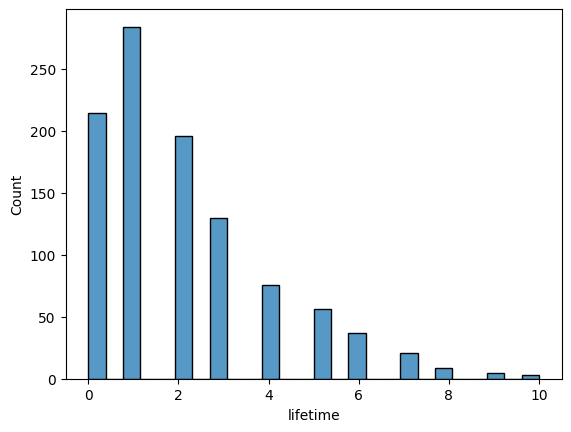

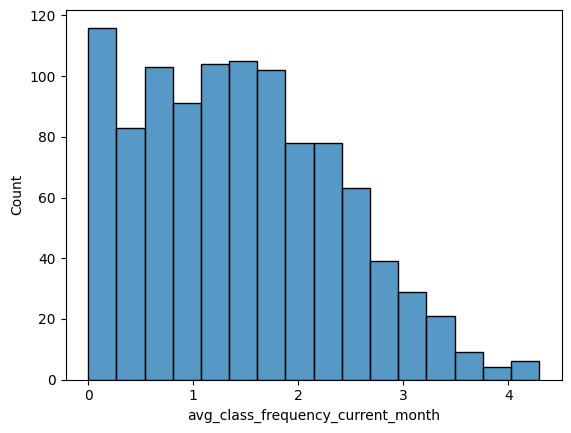

churn
0    53.2%
1    46.8%
Name: churn, dtype: object


In [22]:
#Building distributions for cluster 1
print('Distribution of the features for cluster 1')
distribution(df_1)

This cluster has  47% of churned customers. Here all customers live close to us and we have 23% of customers who are employees of a partner company. Almost no customers here (6% only) who signed up through a "bring a friend" offer. 76% of customers have contract period just for 1 month, no one participates in group activities. 

We can see that near location is not the main factor as both clusters have different churn share but all of the customers live near the Gym.  These conclusions correspond with the previous analysis where we built models to predict churn. 

Let's  look t the distribution for cluster 2

Distribution of the features for cluster 1
near_location
1    99.6%
0     0.4%
Name: near_location, dtype: object
partner
1    95.4%
0     4.6%
Name: partner, dtype: object
promo_friends
1    100.0%
Name: promo_friends, dtype: object
contract_period
12    44.4%
1     29.8%
6     25.8%
Name: contract_period, dtype: object


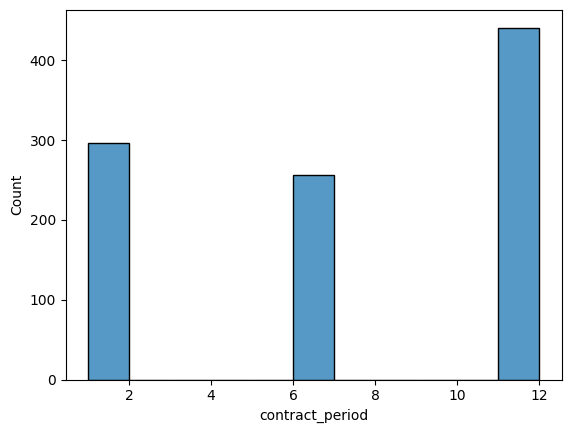

group_visits
1    51.9%
0    48.1%
Name: group_visits, dtype: object


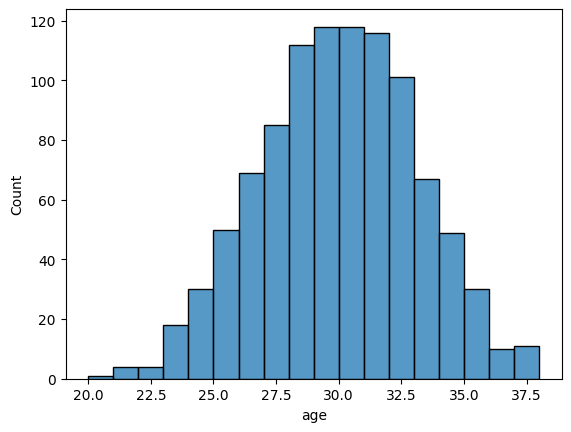

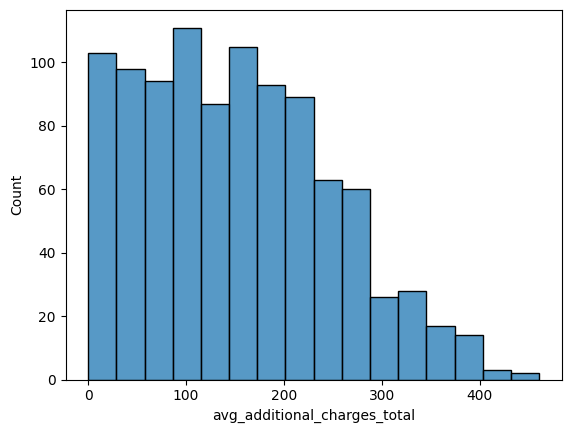

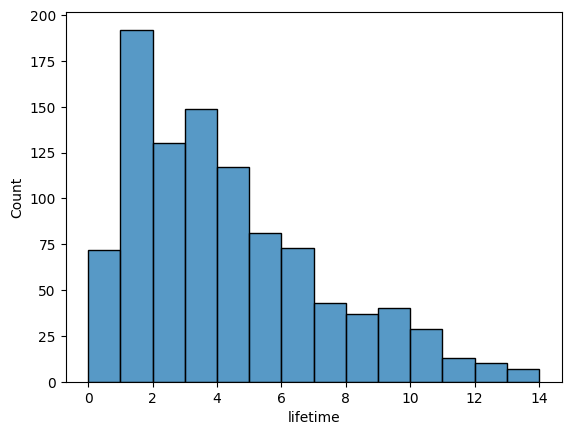

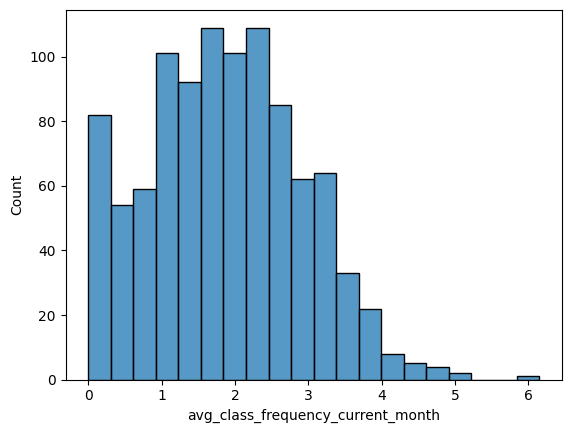

churn
0    86.3%
1    13.7%
Name: churn, dtype: object


In [23]:
#Building distributions for cluster 2
print('Distribution of the features for cluster 1')
distribution(df_2)

This cluster  has  14% of churned customers. Here almost all customers are living close to us and we have 95% of customers who are employees of a partner company. All of the customers here signed up through a "bring a friend" offer. 70% of customers have contract period for 6 or 12 months, 52% of the customers participate in group activities. 

We can see the difference. So far we see that contract period have an influence to the churn.
Let's  look at the distribution for cluster 3

Distribution of the features for cluster 3
near_location
0    100.0%
Name: near_location, dtype: object
partner
0    50.7%
1    49.3%
Name: partner, dtype: object
promo_friends
0    92.5%
1     7.5%
Name: promo_friends, dtype: object
contract_period
1     72.5%
6     18.1%
12     9.5%
Name: contract_period, dtype: object


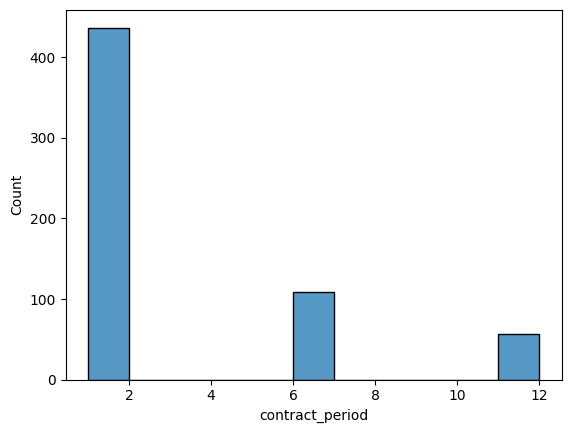

group_visits
0    77.1%
1    22.9%
Name: group_visits, dtype: object


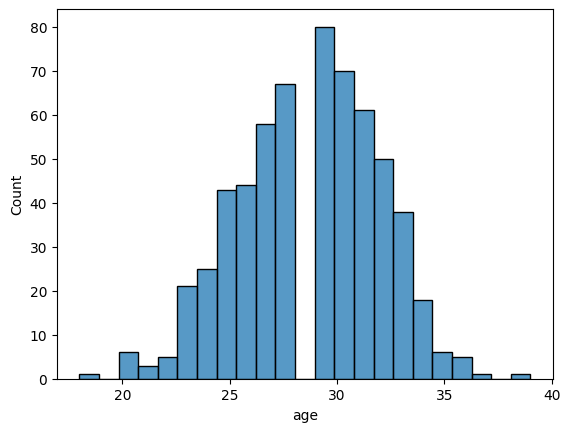

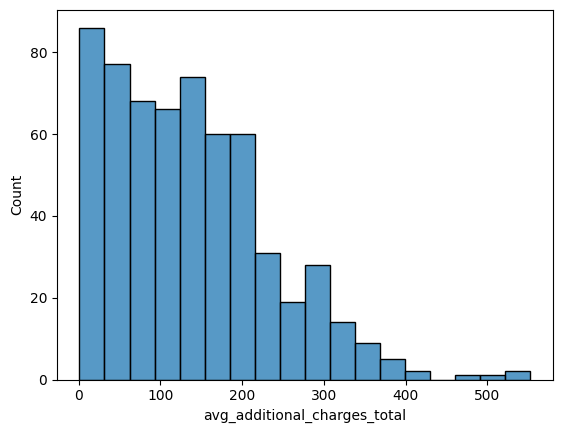

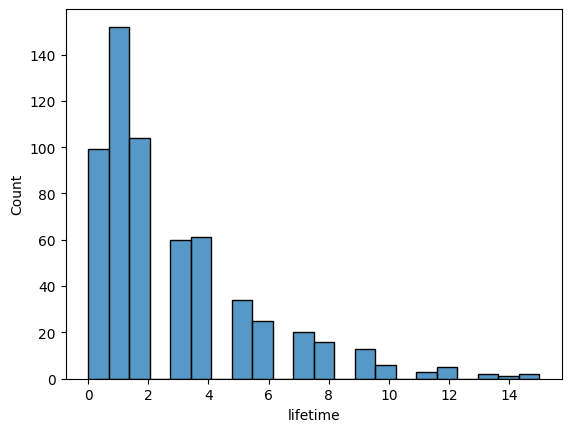

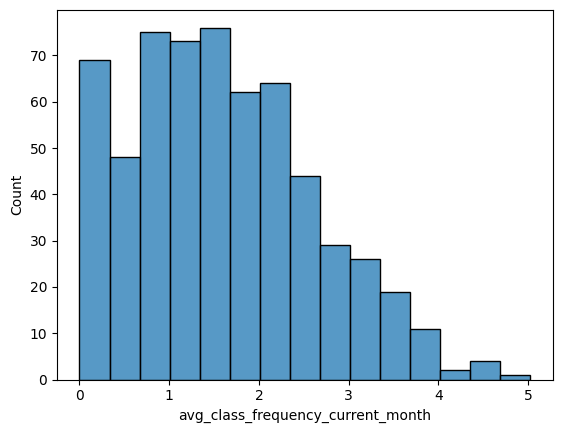

churn
0    59.4%
1    40.6%
Name: churn, dtype: object


In [24]:
#Building distributions for cluster 3
print('Distribution of the features for cluster 3')
distribution(df_3)

This cluster  is very similar to the cluster 1. It has 41% of churned customers. No one live close to us and we have 49% of customers who are employees of a partner company. Just 7.5% of the customers here signed up through a "bring a friend" offer. 73% of customers have contract period for 1 month only, 23% of the customers participate in group activities. 

Finally let's  look at the distribution for cluster 4

Distribution of the features for cluster 4
near_location
1    97.7%
0     2.3%
Name: near_location, dtype: object
partner
1    51.8%
0    48.2%
Name: partner, dtype: object
promo_friends
0    88.5%
1    11.5%
Name: promo_friends, dtype: object
contract_period
12    41.4%
1     35.2%
6     23.4%
Name: contract_period, dtype: object


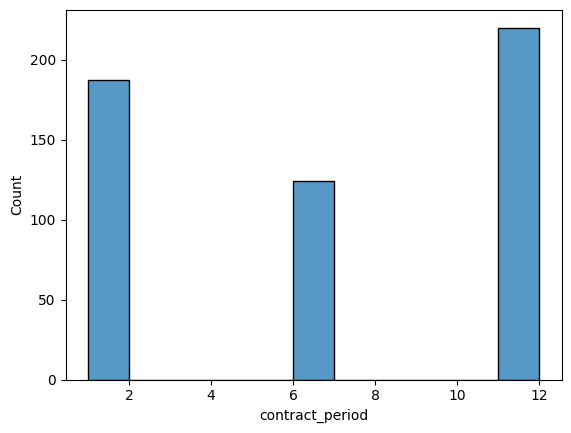

group_visits
0    71.0%
1    29.0%
Name: group_visits, dtype: object


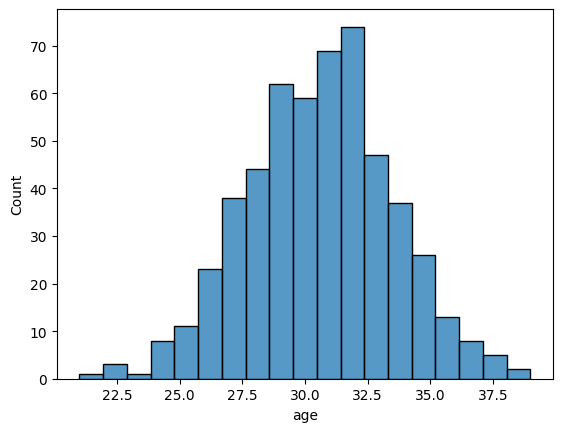

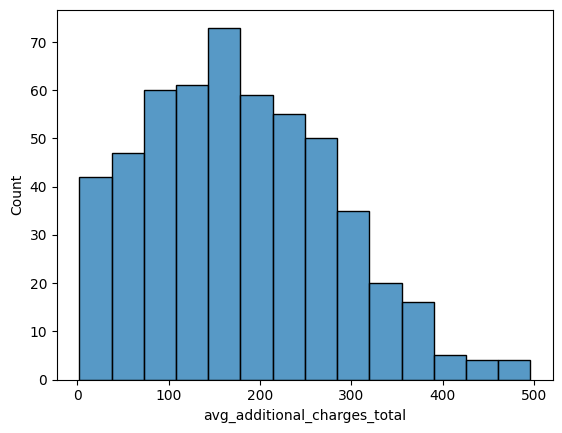

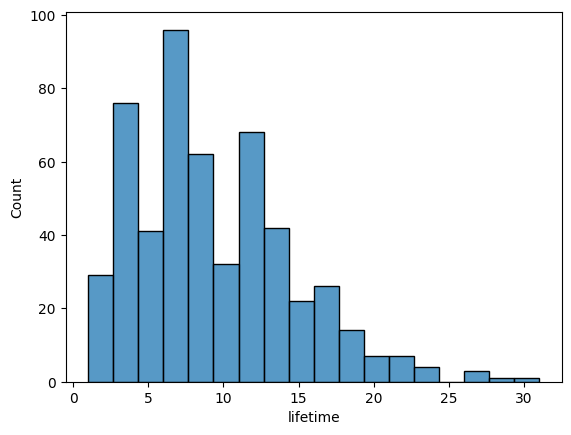

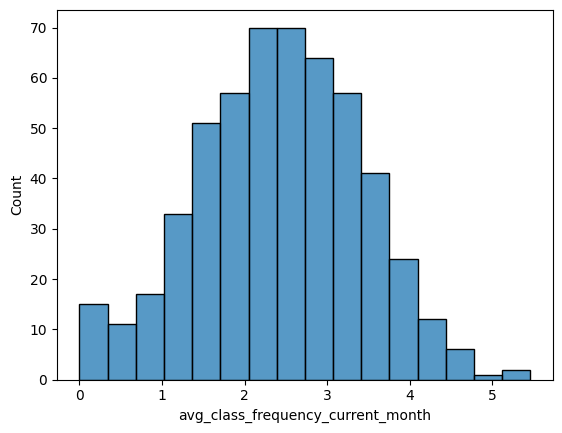

churn
0    99.8%
1     0.2%
Name: churn, dtype: object


In [25]:
#Building distributions for cluster 4
print('Distribution of the features for cluster 4')
distribution(df_4)

This cluster  is the best in terms of churn. Almost no churn customers. Here almost all customers (98%) are living close to us and we have only 52% of customers who are employees of a partner company. Just 11.5% of the customers here signed up through a "bring a friend" offer. 65% of customers have contract period for 6 or 12 months, 29% of the customers participate in group activities. 

So far we can conclude that the main churn factor is contract period. 

Now let's compare age, additional charges, lifetime and visits frequency distributions. We can plot the distributions of the certain feature for different clusters on one graph for better analysis

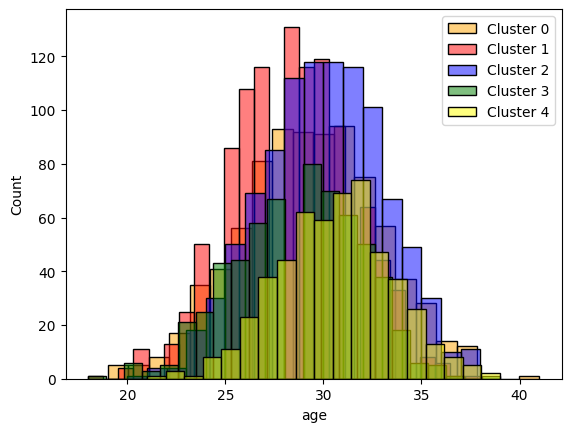

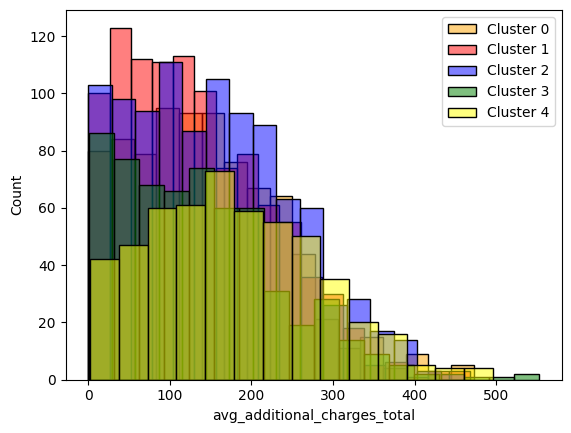

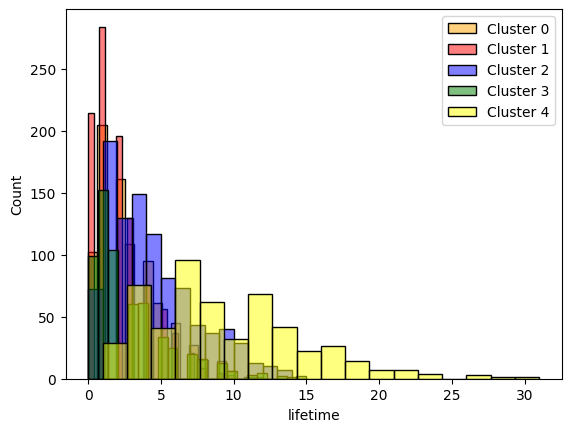

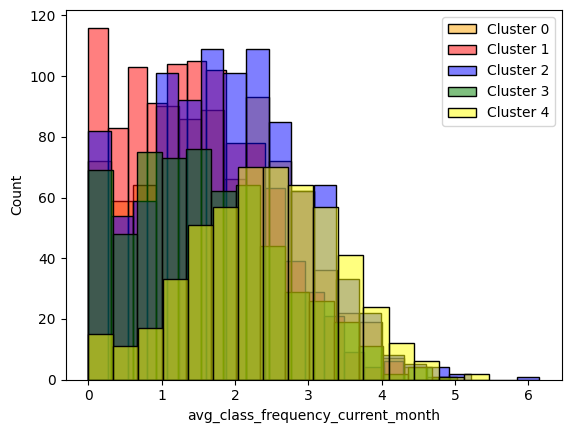

In [26]:
# Comparing histograms for different clusters
for col in df_0:
        if (col =='age' or 
            col == 'avg_additional_charges_total' or
            col == 'lifetime' or 
            col == 'avg_class_frequency_current_month'):  
            sns.histplot(df_0[col], color = 'orange', alpha = 0.5, label = 'Cluster 0')
            sns.histplot(df_1[col], color = 'red', alpha = 0.5, label = 'Cluster 1')
            sns.histplot(df_2[col], color = 'blue', alpha = 0.5, label = 'Cluster 2')
            sns.histplot(df_3[col], color = 'green', alpha = 0.5, label = 'Cluster 3')
            sns.histplot(df_4[col], color = 'yellow', alpha = 0.5, label = 'Cluster 4')
            plt.legend()
            plt.show()

Here we see that age and additional charges has pretty the same distributions. And we have a big difference in life time histogram, where we see that the more churn customers we have, the less life time they have. So lifetime is crucial.  Also we have some difference in the visits frequency distribution. Here we also see such dependence. Customers that come more frequently are in better clusters in terms of churn. 

So, from our cluster analysis we can separate 4 main factors of churn. Contract period, lifetime, friend feature and frequency of visits. Three of them we have separated on the previous step when building models for churn predictions. It confirms that our analysis was correct. 

Let's calculate churn for every  cluster and find out which clusters are prone to leaving, and which are loyal

In [27]:
#Calculating churn for every cluster
cluster_churn = df_clean.groupby('cluster')['churn'].mean().reset_index()

#Formatting churn and printing the result
cluster_churn.churn = cluster_churn.churn.apply(lambda x: "{:.1%}".format(x))
cluster_churn

,cluster,churn
0,0,23.4%
1,1,46.8%
2,2,13.7%
3,3,40.6%
4,4,0.2%


We have clusters 1  and 3 where majority of contracts are just for 1 month, average lifetime is  2.1 - 2.8 months,   less than 10% of customers signed up through a "bring a friend" offer and average visits frequency is 1.4 - 1.6 times per week. These clusters has more than 40% of churn customers and customers with such characteristics are prone to churn.

Cluster 0 has slightly better characteristics. 60% of customers have contract period for just for 1 month Average lifetime is 2,8 months, 8% of the customers signed up through a "bring a friend" offer and average visits frequency is 1.8 times per week. This cluster has 23.4% of churn customers and customers with such characteristics have medium risk  of churn

Cluster 2 has the following characteristics. 70% of customers have contract period for 12 month. Average lifetime is 3.8 months, 100% of the customers signed up through a "bring a friend" offer and average visits frequency is 1.9 times per week. This cluster has 13,7% of churn customers and customers with such characteristics are more or less loyal.

Cluster 4 has the best characteristics in terms of churn. 65% of customers have contract period for 6 or 12 month. Average lifetime is 9.2 months, 11% of the customers signed up through a "bring a friend" offer and average visits frequency is 2.4 times per week. This cluster has less than 1% churn customers and customers with such characteristics are very loyal.

Now we can see that main factors in terms of churn are contract period, lifetime and visits frequency.  

## General conclusion

We were analyst of the Model Fitness which is developing a customer interaction strategy based on analytical data. The most problem of the Company is churn rate and our goal was to find the ways how to flight it in order to improve customer service. 

The purposes of the analysis were:
 - Learn to predict the probability of churn (for the upcoming month) for each customer
 - Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
- Identify target groups
- Suggest measures to cut churn
- Describe any other patterns with respect to interaction with customers

We received data of 4000 rows and 14 columns. The data looked good. There were no missing values, no duplicates and all columns had appropriate data types.  We changed column names to lower case and that's all we needed for that step.

We used describe method and then we wrote a function for visualization of the feature distribution. We built a correlation matrix also and looked for correlations between different features and churn as well as correlations between the features itself.  We found out very strong correlation between total weekly visits and weekly visits for last month (0.95), so we left just one of them - visits for the last month, it shows possible churn better. Also we found out strong correlation between contract period and month till the end of contract (0.97). We also needed to drop one of them and we left just contract period for the purpose of building our churn prediction model. Finally **we left 9 features for our churn prediction model: age, near_location, partner, promo_friends, contract_period, group_visits, avg_additional_charges_total, lifetime, avg_class_frequency_current_month**

We trained 2 different models: logistic regression and random forest algorithms and analyzed the key metrics to choose the best one. **Both models had good accuracy 90%. Random Forest Model has slightly better precision,  the other hand Logistic Regression has better Recall metric and  F1 metric which is trade off between recall and precision.**  As, it is more important for the model not to give us false negative predictions, the Recall is more important metric and **for the purpose of our analysis Logistic Regression model had better performance.**

Then we  found out what features have more influence to the churn. We plotted diagram with the coefficients for Logistic regression model and we used feature importance for Random Forest model. According to both models we saw **TOP 3 important features which has strong influence to the possibility of churn: life time, frequency of visits and age.** The customers who spend a lot of time with us and come to us frequently are not supposed to churn. But if a customer decreased his number of visits, that is a signal that the customer has a possibility of churn and we should pay attention to him and investigate the reasons of decreased frequency of his visits. We should pay much attention to new customers as they are at the risk category in terms of chain. It is interesting that based on data, age feature is important. **Younger customers have bigger risk of churn.** But actually the difference in age is not big for all our customers.

Then We  we built a matrix of distances based on the standardized feature matrix and plotted a dendrogram. We trained the clustering model with the K-means algorithm and predicted customer clusters. Wee plotted also distributions of features for the clusters and calculated the churn rate for each cluster. we found out that **main factors in terms of churn are contract period, lifetime and visits frequency.** The most risk of churn have new customers, we should encourage them to sign contract at least for 6 months and to visit the Gym at least 2 times a week. Those factors have strong influence to the churn rate.

The possible marketing strategy in order to flight the churn rate can be the following:

- 1) Pay special attention to new customers. We need to encourage them to sign contract at least for 6 months and / or to visit the Gym at least 2 times a week.
- 2) Prepare special proposals for clients before the end of the contract to prolong it not less than for 6 months
- 3) Pay special attention to the clients who come to Gym less than 2 times a week or who began to decrease their number of visits.
- 4) Prepare special proposals for young customers (less than 29 years old). They have also higher rusk of churn.